# Deep learning

## Algorithme de reconnaissance de bouteilles de vins et de champagnes

### Problématique

Le but de cet algortihme est de l'utiliser pour mettre en place une application permettant aux utilisateurs de prendre en photo une bouteille de vins ou de champagne en magasin et de pouvoir récupérer des informations sur la bouteille en récupérant par exemple sa description ou une note qui lui serait donné.

Dataset : https://www.kaggle.com/sergiocamerino/wine-vs-sparklings

In [ ]:
# Installation des dépendances pour installer FastAI
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 3.9 MB/s 
     |████████████████████████████████| 189 kB 34.1 MB/s 
     |████████████████████████████████| 1.2 MB 46.1 MB/s 
     |████████████████████████████████| 46 kB 2.5 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 
     |████████████████████████████████| 51 kB 272 kB/s 
Mounted at /content/gdrive


In [ ]:
# Import des librairies de FastAI
from fastbook import *
from fastai.vision.widgets import *


On lie notre drive au colab pour pouvoir y récupérer les données

In [ ]:
# Récupération du chemin du dataset
from google.colab import drive
drive.mount('/content/drive')
wine_train = '/content/drive/MyDrive/Colab Notebooks/DeepLearningWineData/train'

Mounted at /content/drive


In [ ]:
# Récupération des images et affichage du nombre d'images de notre dataset
rcp_img = get_image_files(wine_train)
len(rcp_img)

576

In [ ]:
wines = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    get_y=parent_label)

In [ ]:
# Nb d'images en que l'on prend dans notre train et dans notre test
N_train = 300
N_test = 100
# Image size
img_width = 500
img_height = 500
epochs=10
batch_size=10

In [ ]:
# Creation of the dataloaders
df = wines.dataloaders(wine_train)

### Data Augmentation

In [ ]:
# Data augmentation on the images to have the same size to compare the images
wines = wines.new(
    item_tfms=RandomResizedCrop(500, min_scale=0.5),
    batch_tfms=aug_transforms())
dl = wines.dataloaders(wine_train)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


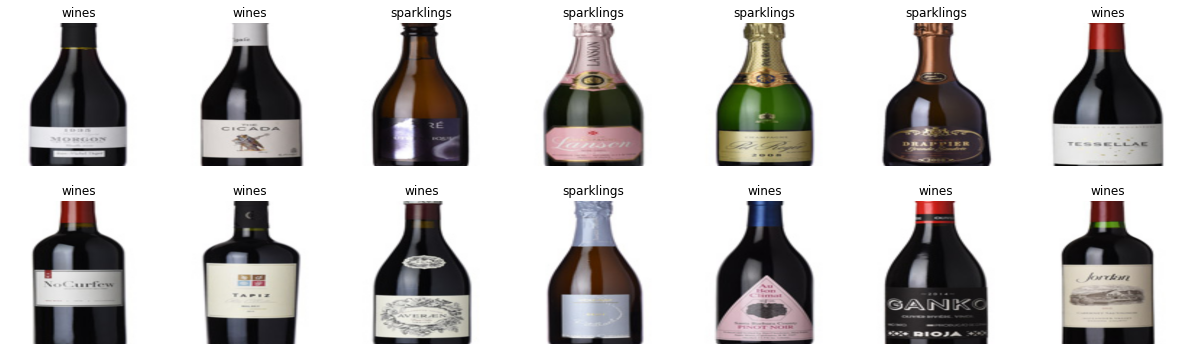

In [ ]:
# affichage d'images provenant du dataset
df.valid.show_batch(max_n=14, nrows=2)

## Entraînement du modèle

In [ ]:
# Entraînement du model
learn = cnn_learner(df, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.812381,0.286173,0.104348,07:24


epoch,train_loss,valid_loss,error_rate,time
0,0.140960,0.093182,0.034783,10:22
1,0.069224,0.033202,0.008696,10:23
2,0.046700,0.022339,0.008696,10:13
3,0.035381,0.020342,0.008696,10:17


Le modèle réduit son error_rate à chaque itération pour tendre vers 0, on atteint le minimum d'error_rate dès la 2ème itération

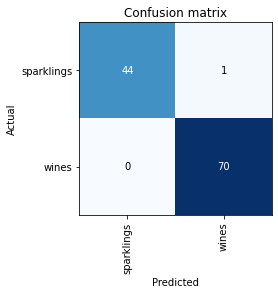

In [ ]:
# Matrice de confusion
classification = ClassificationInterpretation.from_learner(learn)
classification.plot_confusion_matrix()

Via cette matrice de confusion on peut voir que notre modèle à une bonne accuracy

### Exportation du modèle

In [ ]:
learn.export(fname='drive/MyDrive/model.pkl')
path = Path()

In [ ]:
path.ls(file_exts='.pkl')
learn_inf = load_learner('drive/MyDrive/model.pkl')

In [ ]:
learn_inf.dls.vocab

['sparklings', 'wines']

On créer un bouton pour pouvoir récupérer une image et tester notre algorithme

In [ ]:
# Create upload button to add images to test 
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
# Upload image to test with others pictures
img = PILImage.create(btn_upload.data[-1])

In [ ]:
# Tested images
# Selected image : https://github.com/BaptisteHurel/DeepLearning/blob/main/ProjetDeepLearning/sunflowertest1.jpg
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(200,200))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

On effectue notre prédiction entre l'image récupérer et notre modèle

In [ ]:
# Prediction score
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: sparklings; Probability: 0.9082')